# The Transformation and Accept/Reject (aka. Von Neumann) methods 
Python notebook with exercise on how to generate random numbers following a specific PDF using uniformly distributed random numbers, in this case a third degree polynomial: $f(x) = x^3$, in the interval $[0, C]$ where $C$ is a number that ensures that the function if properly normalized.

Both the Accept-Reject (Von Neumann) and transformation method should be considered for the problem:
- Transformation method (if function can be integrated and then inverted).
- Accept-Reject (or Hit & Miss) method (by Ulam Stanislav and John Von Neumann).

### References:
- G. Cowan: Chapter 3
- P. R. Bevington: page 81-84
- __[40. Monte Carlo Techniques PDG](http://pdg.lbl.gov/2020/reviews/rpp2020-rev-monte-carlo-techniques.pdf)__

### Authors: 
- Troels C. Petersen (Niels Bohr Institute)

### Date:    
- 29-11-2022 (latest update)

***

In [71]:
import numpy as np                                     # Matlab like syntax for linear algebra and functions
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Modules to see files and folders in directories
from scipy import stats

Load external functions:

In [72]:
sys.path.append('../../External_Functions')
from ExternalFunctions import Chi2Regression, BinnedLH, UnbinnedLH
from ExternalFunctions import nice_string_output, add_text_to_ax    # Useful functions to print fit results on figure

plt.rcParams['font.size'] = 18     # Set some basic plotting parameters

set the parameters of the program:

In [73]:
r = np.random
r.seed(42)

save_plots = False  
N_points = 10000      # Number of random points used 

xmin = 1
xmax = 5**(1/4)            # Find out yourself what a good interval is.
N_bins = 100          # Find out yourself what a good number of bins is.

# f(x):
def fx_x3(x) :
    k = (xmax - xmin) / N_bins
    N = N_points * k
    return N*x**3

def fit(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

In [74]:
# Define the numpy arrays to be filled:
x_transformation = (4*r.uniform(size=N_points)+1)**(1/4)
x_accepted       = np.zeros(N_points)

for i in range(len(x_accepted)):
    while True:
        x = r.uniform(xmin, xmax)
        y = r.uniform(0, xmax**3) 
        if (x**3 > y):
            break
    x_accepted[i] = x


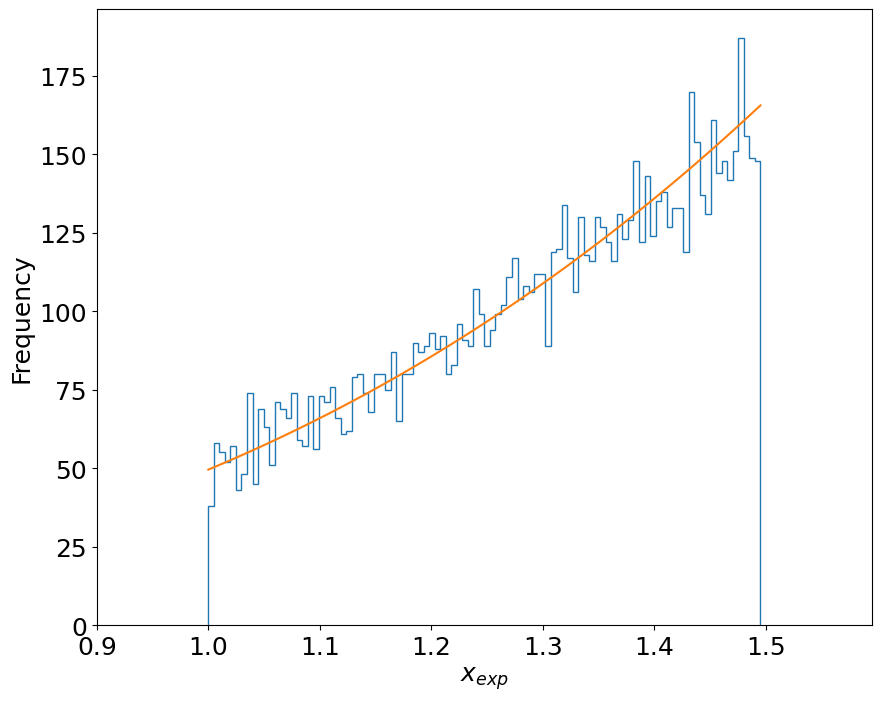

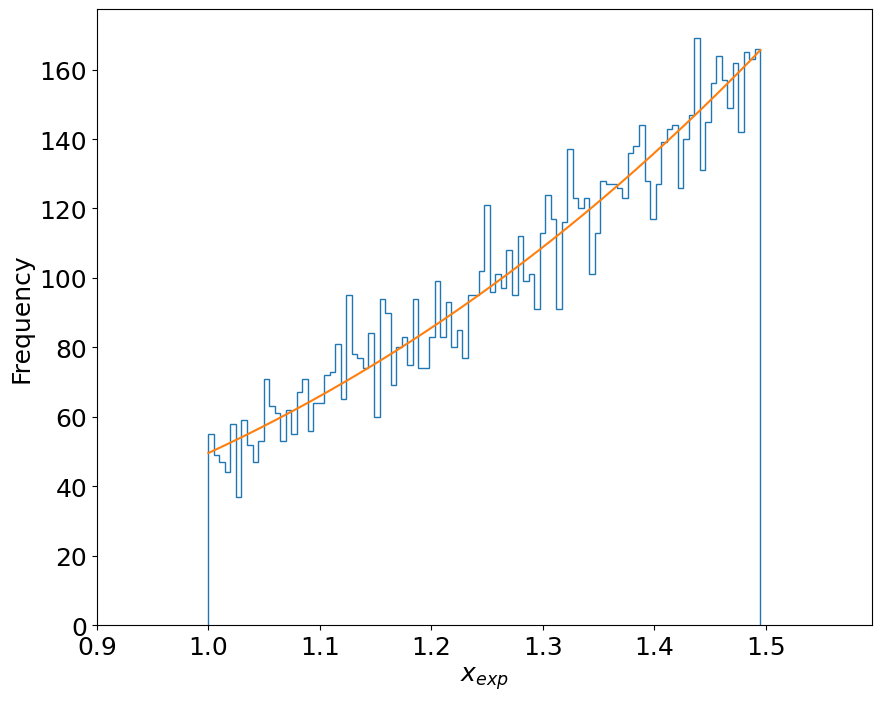

In [75]:
x_ = np.linspace(xmin, xmax, 1000)
y_ = fx_x3(x_)

#Plot x_transformation in histogram
fig, ax = plt.subplots(figsize=(10, 8))
ax.hist(x_transformation, bins=N_bins, range=(xmin, xmax), histtype='step', label='histogram' )
ax.plot(x_, y_, label='f(x)')
ax.set(xlabel=r"$x_{exp}$", ylabel="Frequency", xlim=(xmin-.1, xmax+.1));

#Plot x_accepted in histogram
fig, ax = plt.subplots(figsize=(10, 8))
ax.hist(x_accepted, bins=N_bins, range=(xmin, xmax), histtype='step', label='histogram' )
ax.plot(x_, y_, label='f(x)')
ax.set(xlabel=r"$x_{exp}$", ylabel="Frequency", xlim=(xmin-.1, xmax+.1));


## Problem: 

1) Calculate $C$ such that f(x) is normalised [Analytical problem].
C = $\sqrt{2}$

2) Calculate the relevant integral (below) and inverted function for using the transformation method. Check that the limits actually makes sense [Analytical problem]. Note that it is important to include the limits!

$$F(x) = \int_{0}^{x} f(x') dx'$$
$$F(x) = \frac{1}{4} x^{4}$$
$$F^{-1}(p) = \sqrt[4]{4p}$$

3) Produce random points following $f(x) = x^3$, in the interval $[0, C]$ using **both** the Transformation and the Accept/Reject method. Done see code. 

4) Fit your data with a third degree polynomial, and check that the coefficients correspond to what you would expect.

5) Now try to change the interval from [0,C] to [1,C], and see how the limits change.

# Learning points:

As a basic principle, this exercise should make you capable of using two methods for generating random numbers according to a 1D PDF f(x) based on uniform random numbers (provided by a standard algorithm):
1. Transformation method (using integral+inverse of f(x))
2. Accept-Reject method (using sampling in 2D compared to f(x))

You should know:
1. The advantages and limitations of each method.
2. How to get the desired result out of each method.

Finally, you should understand the motivation behind generating random numbers according to a given distribution, namely for simulating complicated situations (e.g. experimental setup), and evaluating the outcome.